In [1]:
from thesispy.experiments.wandb_client import *
from thesispy.experiments.validation import VALIDATION_NAMES, VALIDATION_ABBRVS
from thesispy.plot_utils import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
ds = get_runs_as_dataset("synthetic_1_fair_comparison")
arrs = ds.aggregate_for_plot(["Optimizer", "MeshSize"])

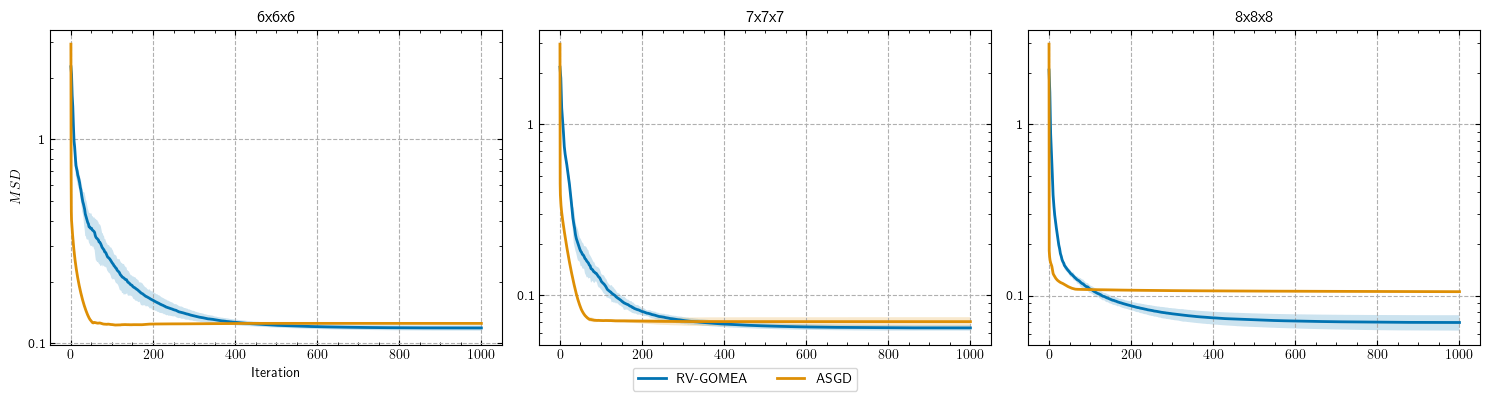

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for optimizer in ["GOMEA", "AdaptiveStochasticGradientDescent"]:
    for i, mesh_size in enumerate([(3, 3, 3), (4, 4, 4), (5, 5, 5)]):
        arr_avg, arr_std = arrs[(optimizer, mesh_size)]
        xs = np.linspace(0, 1000, len(arr_avg))
        label = "RV-GOMEA" if optimizer == "GOMEA" else "ASGD"
        axes[i].plot(xs, arr_avg, label=label)
        axes[i].fill_between(xs, arr_avg - arr_std, arr_avg + arr_std, alpha=0.2)
        
        # formatting
        axes[i].set_yscale("log")
        axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
        axes[i].set_title(mesh_size_as_str(mesh_size), loc="center")


axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("$MSD$")
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc="lower center")

plt.tight_layout()
plt.savefig("fair_comparison.png")

In [6]:
df = ds.aggregate(["Optimizer", "MeshSize"], metrics=VALIDATION_NAMES, val=True)

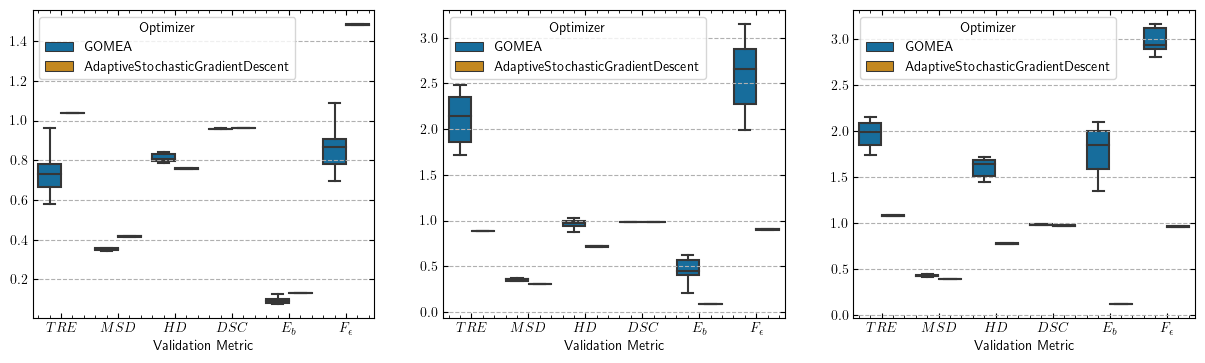

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, mesh_size in enumerate(["(3, 3, 3)", "(4, 4, 4)", "(5, 5, 5)"]):
    df_0 = df.loc[df.MeshSize == mesh_size]
    df_0 = pd.melt(df_0, id_vars=["Optimizer"], value_vars=VALIDATION_NAMES)
    sns.boxplot(data=df_0, x="variable", y="value", hue="Optimizer", showfliers=False, linewidth=1.5, ax=axes[i])
    axes[i].set_xticks([i for i in range(6)], VALIDATION_ABBRVS)
    axes[i].set_xlabel("Validation Metric")
    axes[i].set_ylabel("")

In [31]:
from tabulate import tabulate

rows = []

for i, metric in enumerate(VALIDATION_NAMES):
    row = []
    row.append(VALIDATION_ABBRVS[i])
    for mesh_size in ["(3, 3, 3)", "(4, 4, 4)", "(5, 5, 5)"]:
        df_gomea = df.loc[(df.MeshSize == mesh_size) & (df.Optimizer == "GOMEA")][metric]
        avg_gomea = df_gomea.mean()
        std_gomea = df_gomea.std()

        df_asgd = df.loc[(df.MeshSize == mesh_size) & (df.Optimizer == "AdaptiveStochasticGradientDescent")][metric]
        avg_asgd = df_asgd.mean()
        std_asgd = df_asgd.std()
        
        gomea_better = avg_gomea < avg_asgd if metric != "dice_similarity" else avg_gomea > avg_asgd
        if gomea_better:
            row.append(f"\\textbf{{{avg_gomea:.2f}}} ± {std_gomea:.2f}")
            row.append(f"{avg_asgd:.2f} ± {std_asgd:.2f}")
        else:
            row.append(f"{avg_gomea:.2f} ± {std_gomea:.2f}")
            row.append(f"\\textbf{{{avg_asgd:.2f}}} ± {std_asgd:.2f}")

    rows.append(row)

print(tabulate(rows, headers=["RV-GOMEA", "ASGD"]*3, tablefmt="latex_raw"))

\begin{tabular}{lllllll}
\hline
                & RV-GOMEA             & ASGD                 & RV-GOMEA             & ASGD                 & RV-GOMEA             & ASGD                 \\
\hline
 $TRE$          & \textbf{0.73} ± 0.11 & 1.04 ± 0.00          & 2.10 ± 0.28          & \textbf{0.84} ± 0.15 & 1.97 ± 0.15          & \textbf{1.08} ± 0.00 \\
 $MSD$          & \textbf{0.35} ± 0.01 & 0.42 ± 0.00          & 0.35 ± 0.01          & \textbf{0.31} ± 0.00 & 0.43 ± 0.01          & \textbf{0.39} ± 0.00 \\
 $HD$           & 0.82 ± 0.03          & \textbf{0.76} ± 0.00 & 0.98 ± 0.09          & \textbf{0.71} ± 0.03 & 1.60 ± 0.10          & \textbf{0.78} ± 0.00 \\
 $DSC$          & 0.96 ± 0.00          & \textbf{0.96} ± 0.00 & \textbf{0.99} ± 0.00 & 0.98 ± 0.00          & \textbf{0.98} ± 0.00 & 0.97 ± 0.00          \\
 $E_b$          & \textbf{0.09} ± 0.01 & 0.13 ± 0.00          & 0.49 ± 0.17          & \textbf{0.08} ± 0.01 & 1.86 ± 0.41          & \textbf{0.12} ± 0.00 \\
 $F_{\epsilon}$ & \

In [17]:
df_0

,tre,mean_surface_distance,hausdorff_distance,dice_similarity,bending_energy,dvf_rmse,Optimizer,MeshSize
0,0.727956,0.353244,0.831050,0.960867,0.085346,0.864268,GOMEA,"(3, 3, 3)"
0,0.742380,0.347164,0.839488,0.960261,0.105300,0.918293,GOMEA,"(3, 3, 3)"
0,0.620948,0.342384,0.804792,0.955079,0.090869,0.773161,GOMEA,"(3, 3, 3)"
0,0.797672,0.352058,0.791317,0.959965,0.080759,0.881520,GOMEA,"(3, 3, 3)"
0,0.644000,0.354990,0.785896,0.958801,0.075983,0.745917,GOMEA,"(3, 3, 3)"
0,0.962896,0.356817,0.797239,0.959214,0.101198,1.087354,GOMEA,"(3, 3, 3)"
0,0.736758,0.356089,0.883849,0.958765,0.100520,0.869821,GOMEA,"(3, 3, 3)"
0,0.812705,0.343790,0.824564,0.959906,0.125494,1.017463,GOMEA,"(3, 3, 3)"
0,0.580565,0.349163,0.811785,0.956777,0.081452,0.694314,GOMEA,"(3, 3, 3)"
0,0.721807,0.357910,0.795473,0.958035,0.089089,0.805169,GOMEA,"(3, 3, 3)"
